# Crude oil price prediction using LSTM

### importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing dataset
1.Since data is in form of excel file we have to use pandas read_excel to load the data
2.After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row
3.Check whether any null values are there or not. if it is present then following can be done, a.Imputing data using Imputation method in sklearn b.Filling NaN values with mean, median and mode using fillna() method
4.Describe data --> which can give statistical analysis

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_1018d2e4a4864523b38030089aa67bd6 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_1018d2e4a4864523b38030089aa67bd6 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_1018d2e4a4864523b38030089aa67bd6 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='HKBfBySFuqQ0Ux64EUqcKop9RTMbnj7kJvQCtJq-CYl6',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_1018d2e4a4864523b38030089aa67bd6)

body = client_1018d2e4a4864523b38030089aa67bd6.get_object(Bucket='crudeoil-donotdelete-pr-cfqikqy4cw3wk3',Key='Crude Oil Prices Daily.xlsx')['Body']

data = pd.read_excel(body.read())
data.head()


Date  Closing Value
0 1986-01-02          25.56
1 1986-01-03          26.00
2 1986-01-06          26.53
3 1986-01-07          25.85
4 1986-01-08          25.87

In [3]:
data.head()

Date  Closing Value
0 1986-01-02          25.56
1 1986-01-03          26.00
2 1986-01-06          26.53
3 1986-01-07          25.85
4 1986-01-08          25.87

In [4]:
data.tail()

Date  Closing Value
8218 2018-07-03          74.19
8219 2018-07-04            NaN
8220 2018-07-05          73.05
8221 2018-07-06          73.78
8222 2018-07-09          73.93

In [5]:
data.describe()

Closing Value
count    8216.000000
mean       43.492139
std        29.616804
min        10.250000
25%        19.577500
50%        29.610000
75%        63.402500
max       145.310000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8223 non-null   datetime64[ns]
 1   Closing Value  8216 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 128.6 KB


# Data Preprocessing

## Checking or null values

In [7]:
data.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [8]:
data.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [9]:
data.dropna(axis=0,inplace=True)

In [10]:
data.isnull().sum()

Date             0
Closing Value    0
dtype: int64

In [11]:
data.shape

(8216, 2)

In [12]:
import tensorflow as tf

In [13]:
tf.__version__

'2.7.2'

In [14]:
import tensorflow.keras

In [15]:
tensorflow.keras.__version__

'2.7.0'

### Selecting Closing value column for prediction

In [16]:
data_oil=data.reset_index()['Closing Value']

In [17]:
data_oil

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

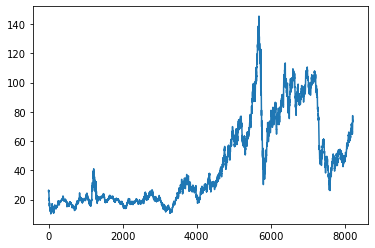

In [18]:
plt.plot(data_oil)

In [19]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [20]:
#Featuring Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_oil=scaler.fit_transform(np.array(data_oil).reshape(-1,1))

In [21]:
print(data_oil)

[[0.11335703]
 [0.11661484]
 [0.12053902]
 ...
 [0.46497853]
 [0.47038353]
 [0.47149415]]


### splitting dataset into train and test split

In [22]:

training_size=int(len(data_oil)*0.65)
test_size=len(data_oil)-training_size
train_data,test_data=data_oil[0:training_size,:],data_oil[training_size:len(data_oil),:1]


In [23]:
training_size,test_size


(5340, 2876)

In [24]:
train_data

array([[0.11335703],
       [0.11661484],
       [0.12053902],
       ...,
       [0.37916482],
       [0.38153413],
       [0.38294092]])

In [25]:
train_data.shape

(5340, 1)

In [26]:
train_data

array([[0.11335703],
       [0.11661484],
       [0.12053902],
       ...,
       [0.37916482],
       [0.38153413],
       [0.38294092]])

In [27]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [28]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [29]:
print(X_train.shape), print(y_train.shape)

(5329, 10)
(5329,)


(None, None)

In [30]:
print(X_test.shape), print(ytest.shape)

(2865, 10)
(2865,)


(None, None)

In [31]:
X_train

array([[0.11335703, 0.11661484, 0.12053902, ..., 0.10980305, 0.1089886 ,
        0.11054346],
       [0.11661484, 0.12053902, 0.11550422, ..., 0.1089886 , 0.11054346,
        0.10165852],
       [0.12053902, 0.11550422, 0.1156523 , ..., 0.11054346, 0.10165852,
        0.09906708],
       ...,
       [0.36731823, 0.35176958, 0.36080261, ..., 0.36391234, 0.37042796,
        0.37042796],
       [0.35176958, 0.36080261, 0.35354657, ..., 0.37042796, 0.37042796,
        0.37879461],
       [0.36080261, 0.35354657, 0.35295424, ..., 0.37042796, 0.37879461,
        0.37916482]])

In [32]:
y_train

array([0.10165852, 0.09906708, 0.08203761, ..., 0.37879461, 0.37916482,
       0.38153413])

In [33]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## Create the Stacked LSTM model

In [34]:
#tensorflow :open source used for both ML and DL for computation
from tensorflow.keras.models import Sequential#it is a plain stack of layers
from tensorflow.keras.layers import Dense#Dense layer is the regular deeply connected neural network layer
from tensorflow.keras.layers import LSTM #Long Short Trem Memory

In [35]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Training the model
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
84/84 [==============================] - 9s 39ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 2/50
84/84 [==============================] - 2s 24ms/step - loss: 1.2990e-04 - val_loss: 8.3468e-04
Epoch 3/50
84/84 [==============================] - 2s 21ms/step - loss: 1.3319e-04 - val_loss: 0.0013
Epoch 4/50
84/84 [==============================] - 2s 22ms/step - loss: 1.3279e-04 - val_loss: 0.0011
Epoch 5/50
84/84 [==============================] - 2s 23ms/step - loss: 1.2213e-04 - val_loss: 8.7287e-04
Epoch 6/50
84/84 [==============================] - 2s 21ms/step - loss: 1.2101e-04 - val_loss: 0.0011
Epoch 7/50
84/84 [==============================] - 2s 22ms/step - loss: 1.2359e-04 - val_loss: 8.7906e-04
Epoch 8/50
84/84 [==============================] - 2s 20ms/step - loss: 1.2835e-04 - val_loss: 0.0012
Epoch 9/50
84/84 [==============================] - 2s 19ms/step - loss: 1.2336e-04 - val_loss: 0.0013
Epoch 10/50
84/84 [==============================] - 2s 21ms/step

In [ ]:
## Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### model evaluation

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

## Predict the train and test data and plot the output

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = np.empty_like(data_oil)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data_oil)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data_oil)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data_oil))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
import pickle
filehandler = open(b"crude.pickle","wb")
pickle.dump("artifact_content.tar",filehandler)
model.save("crude_oil.h5")

In [ ]:
#prediction for next 10 days

In [ ]:
len(test_data)

In [ ]:
x_input=test_data[2866:].reshape(1,-1)
x_input.shape

In [ ]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

In [ ]:
len(temp_input)

### Predict the future 10 days and plot the graph

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<10):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

In [ ]:
day_new=np.arange(1,11)
day_pred=np.arange(11,21)

In [ ]:
len(data_oil)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(data_oil[8206:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=data_oil.tolist()
df3.extend(lst_output)
plt.plot(df3[8100:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)

In [ ]:
!pip install ibm_watson_machine_learning

In [ ]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
                   "url": "https://us-south.ml.cloud.ibm.com",
                   "apikey":"fdxd7UYszu5LaSkURhcCqN6l7T_Xin9FU6gkd249nX7W"
}
client = APIClient(wml_credentials)

In [ ]:
def guid_from_space_name(client,space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name) ['metadata']['id'])
spa = client.spaces.list()
print(spa)

In [ ]:
space_uid = guid_from_space_name(client,'crudeoils')
print("Space UID = " +space_uid)

In [ ]:
client.set.default_space(space_uid)

In [ ]:
client.software_specifications.list()

In [ ]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

In [ ]:
!tar -zcvf Crudeoil1.tgz crude_oil.h5
model_details = client.repository.store_model(model='Crudeoil1.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"Crudeprice",
    client.repository.ModelMetaNames.TYPE:"Tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
                                             )
model_id = client.repository.get_model_id(model_details)

In [ ]:
model_id